## CNN para clasificar entre osos pardos, polares y pandas.

In [ ]:
print("HOLA")

HOLA


In [ ]:
!pip install siuba

In [ ]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from siuba import *
#from siuba.dply.vector import *
from plotnine import *
import time
import tensorflow as tf

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Importación de datos y una pequeña visualización

In [ ]:
def tiempo(segundos):  #Para mostrar el tiempo mejor
  d = {"hora":0, "minuto":0, "segundo":0}
  d["hora"] = segundos//3600
  segundos = segundos - d["hora"]*3600
  d["minuto"] = segundos//60
  segundos = segundos - d["minuto"]*60
  d["segundo"] = segundos
  return d

In [ ]:
%cd /content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Osos

/content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Osos


In [ ]:
%cd panda
!unzip panda.zip

%cd ..

%cd polar
!unzip polar.zip

%cd ..

%cd pardo
!unzip pardo.zip

%cd ..

%cd rojos
!unzip rojos.zip

In [ ]:
#Para eliminar los archivos .zip (que se realiza una vez)
#!rm -rf /content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Osos/panda/padan.zip
#!rm -rf /content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Osos/pardo/pardo.zip
#!rm -rf /content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Osos/polar/polar.zip
#!rm -rf /content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Osos/rojos/rojos.zip

In [ ]:
!ls /content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Osos/panda | wc -l #403
!ls /content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Osos/pardo | wc -l #442
!ls /content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Osos/polar | wc -l #446
!ls /content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Osos/rojos | wc -l #336

403
442
446
336


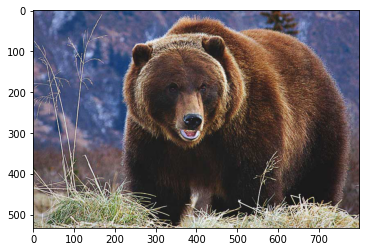

In [ ]:
#Viendo algunas imagenes:
path = "/content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Osos"
pardo_path = os.listdir("/content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Osos" + "/pardo")
plt.imshow(plt.imread(path + "/pardo" + "/" + pardo_path[0]))

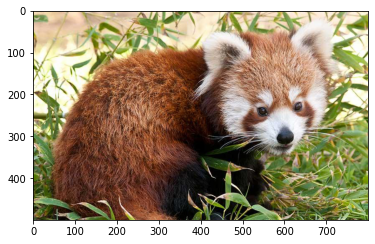

In [ ]:
rojos_path = os.listdir("/content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Osos" + "/rojos")
plt.imshow(plt.imread(path + "/rojos" + "/" + rojos_path[1]))

## Obtener el mismo número de imágenes para los cuatro casos

In [ ]:
#Y limitarlas a 336
import shutil

carpeta_fuente = "/content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Osos/panda"
carpeta_destino = "/content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Dataset_osos/panda"

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 336:
    #Copia de la carpeta fuente a la de destino
    shutil.copy(carpeta_fuente + "/" + nombreimg, carpeta_destino + "/" + nombreimg)

In [ ]:
#Y limitarlas a 336
import shutil

carpeta_fuente = "/content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Osos/pardo"
carpeta_destino = "/content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Dataset_osos/pardo"

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 336:
    #Copia de la carpeta fuente a la de destino
    shutil.copy(carpeta_fuente + "/" + nombreimg, carpeta_destino + "/" + nombreimg)

In [ ]:
#Y limitarlas a 336
import shutil

carpeta_fuente = "/content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Osos/polar"
carpeta_destino = "/content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Dataset_osos/polar"

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 336:
    #Copia de la carpeta fuente a la de destino
    shutil.copy(carpeta_fuente + "/" + nombreimg, carpeta_destino + "/" + nombreimg)

In [ ]:
#Y limitarlas a 336
import shutil

carpeta_fuente = "/content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Osos/rojos"
carpeta_destino = "/content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Dataset_osos/rojos"

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 336:
    #Copia de la carpeta fuente a la de destino
    shutil.copy(carpeta_fuente + "/" + nombreimg, carpeta_destino + "/" + nombreimg)

In [ ]:
data_path = "/content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/Datos/Dataset_osos"
os.listdir(data_path)

['panda', 'polar', 'rojos', 'pardo']

In [ ]:
print(len(os.listdir(data_path + "/panda"))) #Ya tienen la misma cantidad de elementos
print(len(os.listdir(data_path + "/pardo")))
print(len(os.listdir(data_path + "/polar")))
print(len(os.listdir(data_path + "/rojos")))

336
336
336
336


In [ ]:
print(len(os.listdir(path + "/panda"))) #En general, esa es la cantidad de imagenes en cada clase
print(len(os.listdir(path + "/pardo")))
print(len(os.listdir(path + "/polar")))
print(len(os.listdir(path + "/rojos")))

403
442
446
336


# Hay dos posibles caminos:
1. Remdimensiono todo y luego divido entre el train y el test  (intento este primero, para predecir, las nuevas imágenes también tendrán que ser primero redimensionadas antes de meterlas al modelo.predict())
2. Divido entre el train y el test, sin redimensionar

En ambos casos se normaliza a valores entre 0 y 1.

## Redimensionamiento

In [ ]:
#Veamos el tamaño de algunas imagenes:
cont = 0
for i in os.listdir(data_path + "/panda"):
  print((plt.imread(data_path + "/panda" + "/" + i)).shape)
  cont = cont + 1
  if cont == 5:
    break

(183, 275, 3)
(800, 1200, 3)
(183, 275, 3)
(100, 100, 3)
(189, 267, 3)


In [ ]:
def tamaños(categoria):  #Función para calcular la suma de las alturas y anchuras de las imágenes, para obtener el promedio posteriormente.
  dim1 = []
  dim2 = []
  for i in os.listdir(data_path + "/" + categoria):
    a, b, color = plt.imread(data_path + "/" + categoria + "/" + i).shape
    dim1.append(a)
    dim2.append(b)
  return dim1, dim2

In [ ]:
dpan1, dpan2 = tamaños("panda")
dpar1, dpar2 = tamaños("pardo")
dpol1, dpol2 = tamaños("polar")
dro1, dro2 = tamaños("rojos")
dtotal1 = dpan1 + dpar1 +dpol1 +dro1
dtotal2 = dpan2 + dpar2 +dpol2 +dro2

In [ ]:
dtotal1 = dpan1  +dpol1 +dro1
dtotal2 = dpan2  +dpol2 +dro2

288.40277777777777 423.5962301587302


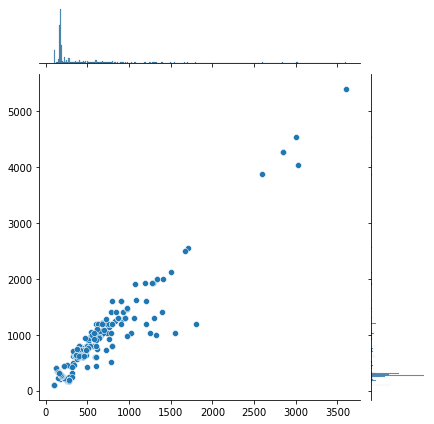

In [ ]:
#Promedio en general:
print(np.mean(dtotal1), np.mean(dtotal2))
sns.jointplot(x = dtotal1, y = dtotal2) #En general, si varian mucho, aunque la mayoría se encuentra abajo de los 1000 px, tanto en altura como en anchura.

In [ ]:
imagen_shape = (300, 430, 3)  #Tamaño para todas
batch_size = 16 #Y tamaño de batch (cambiar luego a 8)
imagen_shape[:2]

(300, 430)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
imagen_gen = ImageDataGenerator(
    rotation_range = 20, #Rotación máxima de hasta 20 grados
    width_shift_range = 0.10, #Desplazamiento de la anchura máxima entre -5% al 5%
    height_shift_range = 0.10,  #Desplazamiento de la altura máxima entre -5% al 5%
    rescale = 1/255,   #Normalizar la imágen para que esté entre 0 y 1 los valores (redimensionamiento)
    shear_range = 0.15, #Distorsión de la imágen a partir de un eje - perspectiva (del 10%)
    zoom_range = 0.1, #Zoom en máximo del 10%
    horizontal_flip = True, #Permite giro horizontal de la imágen (espejo)
    fill_mode = "nearest",  #Rellena los píxeles vacíos con el valor más cercano
    validation_split = 0.2 #20% para test, y 80% para entrenamiento.
)


#Esto siguiente se puede cambiar
data_gen_train = imagen_gen.flow_from_directory(data_path,   #path es para todas las imagenes, y data_path para 336 imagenes en cada categoria
                                                target_size = imagen_shape[:2],
                                                color_mode = "rgb",
                                                batch_size = batch_size,
                                                class_mode = "categorical",
                                                subset = "training")
data_gen_test = imagen_gen.flow_from_directory(data_path,    #path es para todas las imagenes, y data_path para 336 imagenes en cada categoria
                                                target_size = imagen_shape[:2],
                                                color_mode = "rgb",
                                                batch_size = batch_size,
                                                class_mode = "categorical",
                                                shuffle = False, subset = "validation")

Found 1300 images belonging to 4 classes.
Found 323 images belonging to 4 classes.


In [ ]:
#Veamos algunos ejemplos de las tranformaciones:
imagen_pardo = data_path + "/pardo" + "/" + os.listdir(data_path + "/pardo")[0]
imagen_pardo = plt.imread(imagen_pardo)

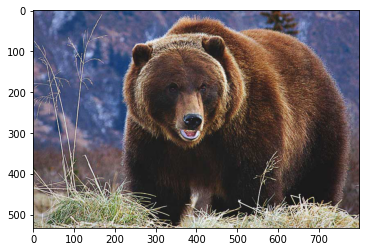

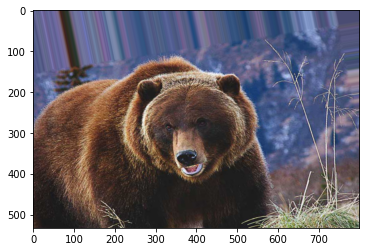

In [ ]:
plt.subplots(1,1)
plt.imshow(imagen_pardo)
plt.subplots(1,1)
plt.imshow(imagen_gen.random_transform(imagen_pardo))

In [ ]:
print(imagen_gen.flow_from_directory(data_path)) #899 datos, en 4 diferentes clases. (O 1474 datos, en 4 diferentes clases)
print(data_gen_train.image_shape)
print(data_gen_test.image_shape)
print(data_gen_train.class_indices)
print(data_gen_test.class_indices)

Found 1340 images belonging to 4 classes.
(300, 430, 3)
(300, 430, 3)
{'panda': 0, 'pardo': 1, 'polar': 2, 'rojos': 3}
{'panda': 0, 'pardo': 1, 'polar': 2, 'rojos': 3}


## Modelo:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten

In [ ]:
imagen_shape

(300, 430, 3)

In [ ]:
modelo = Sequential()

modelo.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = imagen_shape, activation = "relu"))
modelo.add(MaxPooling2D(pool_size = (2, 2)))

modelo.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = imagen_shape, activation = "relu"))
modelo.add(MaxPooling2D(pool_size = (2, 2)))

modelo.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = imagen_shape, activation = "relu"))
modelo.add(MaxPooling2D(pool_size = (2, 2)))

modelo.add(Conv2D(filters = 128, kernel_size = (3, 3), input_shape = imagen_shape, activation = "relu"))
modelo.add(MaxPooling2D(pool_size = (2, 2)))

modelo.add(Flatten())

modelo.add(Dense(units = 256))
modelo.add(Activation("relu"))

modelo.add(Dropout(0.5))

modelo.add(Dense(units = 4, activation = "softmax"))


modelo.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 428, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 214, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 212, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 106, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 104, 64)       36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 52, 64)       0

## Entrenamiento

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 2)

In [ ]:
#Es buena práctica:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
ini = time.time()
modelo.fit(
    data_gen_train,
    epochs = 15,
    validation_data = data_gen_test,
    callbacks = [early_stop]
)
fin = time.time() - ini

Epoch 1/10
82/82 [==============================] - 351s 4s/step - loss: 1.0301 - accuracy: 0.5485 - val_loss: 0.6807 - val_accuracy: 0.7059
Epoch 2/10
82/82 [==============================] - 341s 4s/step - loss: 0.7185 - accuracy: 0.7254 - val_loss: 0.5424 - val_accuracy: 0.7616
Epoch 3/10
82/82 [==============================] - 340s 4s/step - loss: 0.6156 - accuracy: 0.7577 - val_loss: 0.6045 - val_accuracy: 0.7678
Epoch 4/10
82/82 [==============================] - 339s 4s/step - loss: 0.5961 - accuracy: 0.7869 - val_loss: 0.4809 - val_accuracy: 0.8019
Epoch 5/10
82/82 [==============================] - 339s 4s/step - loss: 0.4723 - accuracy: 0.8246 - val_loss: 0.3798 - val_accuracy: 0.8731
Epoch 6/10
82/82 [==============================] - 338s 4s/step - loss: 0.4474 - accuracy: 0.8438 - val_loss: 0.3682 - val_accuracy: 0.8607
Epoch 7/10
82/82 [==============================] - 338s 4s/step - loss: 0.4052 - accuracy: 0.8508 - val_loss: 0.2874 - val_accuracy: 0.8824
Epoch 8/10
82

In [ ]:
print(tiempo(fin))

{'hora': 1.0, 'minuto': 0.0, 'segundo': 48.737664461135864}


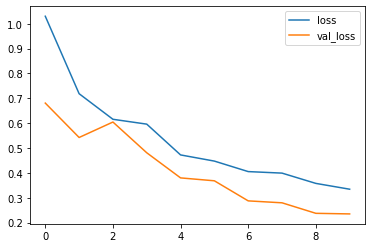

In [ ]:
pd.DataFrame(modelo.history.history)[["loss", "val_loss"]].plot()

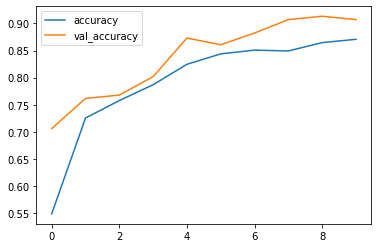

In [ ]:
pd.DataFrame(modelo.history.history)[["accuracy", "val_accuracy"]].plot()

## Evalución del modelo

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(modelo.metrics_names)
modelo.evaluate_generator(data_gen_test)

['loss', 'accuracy']


<ipython-input-87-9780b7b50c75>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.


[0.37502920627593994, 0.8703071475028992]

In [ ]:
data_gen_test.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
prediccion = modelo.predict(data_gen_test) 

21/21 [==============================] - 31s 1s/step


In [ ]:
prediccion

In [ ]:
prediccion = np.argmax(prediccion, axis = -1)

In [ ]:
prediccion

array([0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
print(classification_report(prediccion, data_gen_test.classes))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        75
           1       0.92      0.90      0.91        90
           2       0.93      0.97      0.95        86
           3       1.00      0.92      0.96        72

    accuracy                           0.94       323
   macro avg       0.94      0.94      0.94       323
weighted avg       0.94      0.94      0.94       323



In [ ]:
confusion_matrix(data_gen_test.classes, prediccion)

array([[73,  5,  0,  2],
       [ 0, 81,  3,  4],
       [ 2,  4, 83,  0],
       [ 0,  0,  0, 66]])

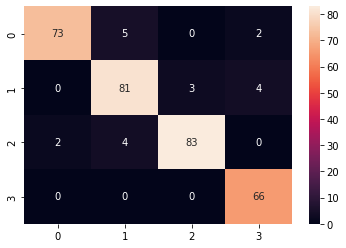

In [ ]:
sns.heatmap(confusion_matrix(data_gen_test.classes, prediccion), annot = True)

## Predicción

In [ ]:
imagen_shape

(300, 430, 3)

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, imagen_shape[:2])
  prediccion = modelo.predict(img.reshape(-1, 300, 430, 3))
  plt.imshow(img)
  print(prediccion)
  return np.argmax(prediccion[0], axis = -1)

In [ ]:
data_gen_train.class_indices

{'panda': 0, 'pardo': 1, 'polar': 2, 'rojos': 3}

1/1 [==============================] - 0s 118ms/step
[[3.6136075e-07 2.1098835e-04 9.9978858e-01 1.5244335e-07]]


2

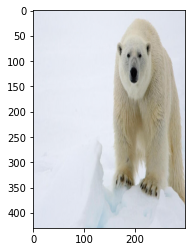

In [ ]:
categorizar("https://files.worldwildlife.org/wwfcmsprod/images/Polar_Bear_New_Hero_Image/hero_small/90x2m4x6df_polar_bear_hero.jpg")

1/1 [==============================] - 0s 153ms/step
[[6.1077560e-11 1.8980004e-02 1.6519490e-07 9.8101979e-01]]


3

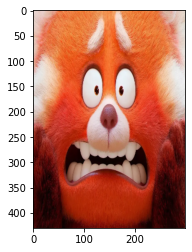

In [ ]:
categorizar("https://areajugones.sport.es/wp-content/uploads/2022/03/pixar.webp")

1/1 [==============================] - 0s 78ms/step
[[0.20418836 0.71881175 0.04931219 0.02768768]]


1

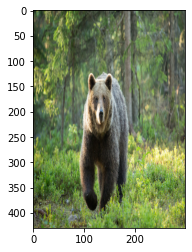

In [ ]:
categorizar("https://dam.ngenespanol.com/wp-content/uploads/2022/02/osos-pardos-caza2.jpg")

1/1 [==============================] - 0s 169ms/step
[[0.39499453 0.30231264 0.08105824 0.22163463]]


0

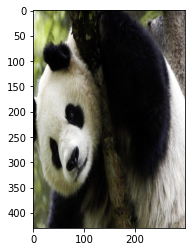

In [ ]:
categorizar("https://files.worldwildlife.org/wwfcmsprod/images/HERO_Giant_Panda_113974/hero_small/7270gqb4yg_Bernard_de_wetter_wwf_canon_113974.jpg")

In [ ]:
data_gen_train.class_indices

{'panda': 0, 'pardo': 1, 'polar': 2, 'rojos': 3}

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
modelo.save("/content/drive/MyDrive/Ciencia_de_Datos_con_Python/Proyectos/modelo_osos.h5")